<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/Ergasia1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alexandros_Tsevrenis_MTN1914***

# **Import essential libraries**

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.tree import export_graphviz
import io
from io import StringIO
import pandas
import IPython
from IPython.display import Image
import pydotplus

# **Import day.csv file with GOOGLE_COLAB**

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving day.csv to day.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "day.csv" with length 56806 bytes


**Test if day.csv is loaded by removing comment '#' below**

In [0]:
#uploaded

# **Read the dataset from the CSV file**

**Define df variable as day.csv using pandas library.
Read a comma-separated values (csv) file into DataFrame.**

In [0]:
df = pandas.read_csv(io.StringIO(uploaded['day.csv'].decode('utf-8')))

# **Select Features**

**Set feature_set=0 and fill variable features with the important features that we need for our model to be good**  ('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum')

**If you set feature_set=1 or feature_set=2 you can test the model for the most important features by deleting the less important but we use only set 0 for this exercise.**

In [0]:
############################classification_decisiontree######################################
feature_set = 0
if feature_set == 0:
    features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum']
elif feature_set == 1:
    features = ['yr', 'mnth', 'weathersit', 'temp', 'atemp','hum']
elif feature_set == 2:
    features = ['yr', 'temp', 'atemp', 'hum']

**Define our X variable and assign our features.
Define our y target variable with cnt feature.**

In [0]:
X = df[features]
y = df['cnt']

# **Put the class values into 10 bins, to create 10 classes...**

**Define the names of our 10 classification labels for feature_set=0 and after use pandas.cut to restructure y data with the new labels.**

In [0]:

classification_labels_0 = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
classification_labels_1 = ["a", "b", "c", "d", "e", "f"] # for feature_set = 1
classification_labels_2 = ["a", "b", "c", "d"] # for feature_set = 2

y = pandas.cut(y, 10, labels=classification_labels_0)
#y = pandas.cut(y, 6, labels=classification_labels_1) # for feature_set = 1
#y = pandas.cut(y, 4, labels=classification_labels_2) # for feature_set = 2

**Print the first 100 values of y target_variable with and without classification so we can understand how data are classified**

In [11]:

print(X)
########## labeling in first 100 ##############
y_head = df['cnt'][:100].values
y_head_classified = y[:100].values
for i in range(len(y_head)):
    print('y_head', [i], '=', y_head[i], ',')
    print('classified_y_head', [i], '=', y_head_classified[i], '\n')


     season  yr  mnth  holiday  ...  weathersit      temp     atemp       hum
0         1   0     1        0  ...           2  0.344167  0.363625  0.805833
1         1   0     1        0  ...           2  0.363478  0.353739  0.696087
2         1   0     1        0  ...           1  0.196364  0.189405  0.437273
3         1   0     1        0  ...           1  0.200000  0.212122  0.590435
4         1   0     1        0  ...           1  0.226957  0.229270  0.436957
..      ...  ..   ...      ...  ...         ...       ...       ...       ...
726       1   1    12        0  ...           2  0.254167  0.226642  0.652917
727       1   1    12        0  ...           2  0.253333  0.255046  0.590000
728       1   1    12        0  ...           2  0.253333  0.242400  0.752917
729       1   1    12        0  ...           1  0.255833  0.231700  0.483333
730       1   1    12        0  ...           2  0.215833  0.223487  0.577500

[731 rows x 10 columns]
y_head [0] = 985 ,
classified_y_head [0

**Use Kfold method to split into 20 folds and use 19/20 for training and 1/20 for validations, initialize variables acc_train=0, acc_test=0 and best_clf=None**

In [0]:
# Split into 20 folds and use 19/20 for training
# and 1/20 for validation. Return the best model
# among these 20 models as the final outcome.
kf = KFold(n_splits=20, shuffle=False, random_state=None)
acc_train = 0.0
acc_test = 0.0
best_clf = None

**There is another way to split our data but we won't use it in this example**

In [0]:
#X_train,X_test,y_train,y_test = train_test_split(X, new_y, test_size=0.20, random_state=None)
#sc= StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# **Decision tree classifier**

**Here we create the for loop and split our data with kfold, define X_train,X_test, y_train, y_test, clf variable is the DecisionTreeClassifier.We limit our decision tree's depth up to 4 so we can have a good model with the essential info we need to see without overfit or underfit and for that to discover we will use acc_train and acc_test which are metrics.accuracy_score**

**In the output: If we have 50-60% on acc_train this means our model is good, our model not need too be too specific and not too general, if we had over 80% we would have too much info to read and probably we would reach a dangerous zone for overfit(this to happen we needed to maximize our tree's depth) but if we had under 50% probably our model would be poor and too close to underfit.**

In [13]:

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth=4, criterion="gini")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, y_pred)
    y_pred = clf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test, y_pred)
    print('acc_train:', acc_train)
    print('acc_test:', acc_test)
    print('feature importance:', clf.feature_importances_)
    print('\n')
    best_clf = clf
    dot_data = StringIO()


acc_train: 0.5504322766570605
acc_test: 0.05405405405405406
feature importance: [0.16189303 0.18646615 0.07054555 0.         0.02285871 0.
 0.02380206 0.20542486 0.27289566 0.05611397]


acc_train: 0.5446685878962536
acc_test: 0.6486486486486487
feature importance: [0.11915303 0.18440351 0.18231657 0.         0.02264463 0.
 0.02407557 0.         0.40317069 0.06423599]


acc_train: 0.5648414985590778
acc_test: 0.08108108108108109
feature importance: [0.28426118 0.17511652 0.03311388 0.         0.02123415 0.
 0.         0.08712027 0.31237917 0.08677482]


acc_train: 0.5403458213256485
acc_test: 0.43243243243243246
feature importance: [0.1726561  0.34450186 0.09539063 0.         0.01861466 0.
 0.04051043 0.09580358 0.21416689 0.01835585]


acc_train: 0.5432276657060519
acc_test: 0.6216216216216216
feature importance: [0.09568849 0.17238191 0.22058475 0.         0.02178846 0.
 0.         0.08681308 0.33997257 0.06277074]


acc_train: 0.5446685878962536
acc_test: 0.43243243243243246
feature

**Finally our decision_tree is printed as a graph in a PNG File that will show up in our jupyter, depending on which criterion gini or entropy, split method and max_depth we used the most prominent features will appear at the top of the decision tree and they will have the maximum gini index value. In this case, yr and temp are the most prominent features.**

In [14]:
export_graphviz(best_clf, out_file=dot_data, filled=True, special_characters=True,
                rounded=True, feature_names=features, class_names=classification_labels_0)

print('\n The most prominent features are <temp> and <yr> based on the decision_tree, gini index and feature performance.')


 The most prominent features are <temp> and <yr> based on the decision_tree, gini index and feature performance.


# **Visualize tree**

**If you want the decision_tree to be more clear please open the image with right click in a new tab.**

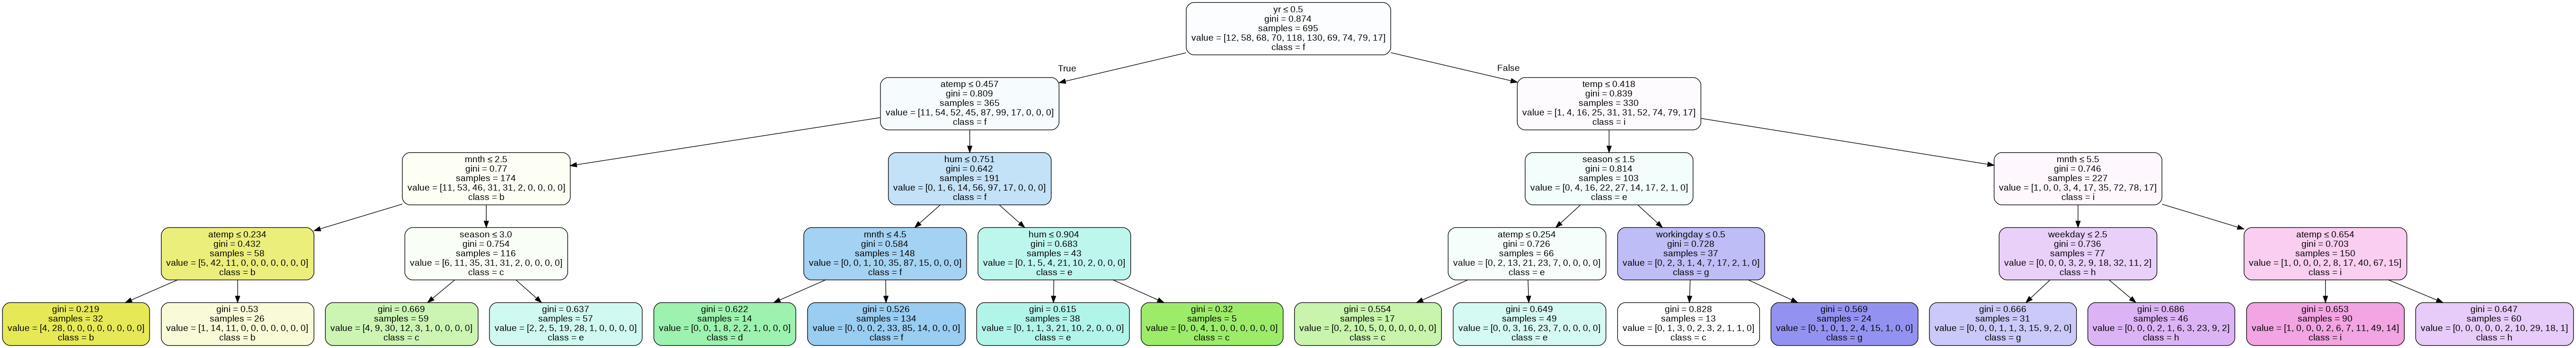

In [15]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.set_size('')
Image(graph.create_png())

**The most prominent features are temp and yr based on the decision_tree, gini index and feature performance.**